In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Read in the dataset

In [2]:
df=pd.read_csv('honeyproduction 1998-2021.csv')

#### Top 5 rows of the dataset

In [4]:
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


#### Check the Shape of the Dataset

In [5]:
df.shape    # rows= 985, cols= 8

(985, 8)

#### Check the Datatypes

In [6]:
df.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

#### Check the columns

In [7]:
df.columns

Index(['State', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

#### Observations:
    1) State is object datatype
    2) year is integer type. Since year is categorial variable.
    3) All the other variables are (int64 and float64) data types.

In [8]:
df.year.astype('category')

0      1998
1      1998
2      1998
3      1998
4      1998
       ... 
980    2021
981    2021
982    2021
983    2021
984    2021
Name: year, Length: 985, dtype: category
Categories (24, int64): [1998, 1999, 2000, 2001, ..., 2018, 2019, 2020, 2021]

In [9]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,985.000000,985.000000,9.850000e+02,9.850000e+02,985.000000,9.850000e+02,985.000000
mean,62892.385787,58.402030,4.035132e+06,1.167187e+06,1.969594,5.939911e+06,2009.291371
std,94163.791917,19.291695,6.752290e+06,2.088589e+06,1.177922,9.806595e+06,6.962251
min,2000.000000,3.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,45.000000,4.690000e+05,1.080000e+05,1.200000,1.037000e+06,2003.000000
50%,26000.000000,55.000000,1.488000e+06,3.600000e+05,1.700000,2.409000e+06,2009.000000
75%,68000.000000,70.000000,3.780000e+06,1.217000e+06,2.360000,5.897000e+06,2015.000000
max,530000.000000,136.000000,4.641000e+07,1.380000e+07,8.230000,8.385900e+07,2021.000000


In [ ]:
# Observations:
    1) Number of colonies in every state are spread over a huge range. Ranging from 2000 to 530000.
    2) The mean numcol is close to 75% percentile of the data.

#### relationship between numerical variables using pair ploys and correlation plots

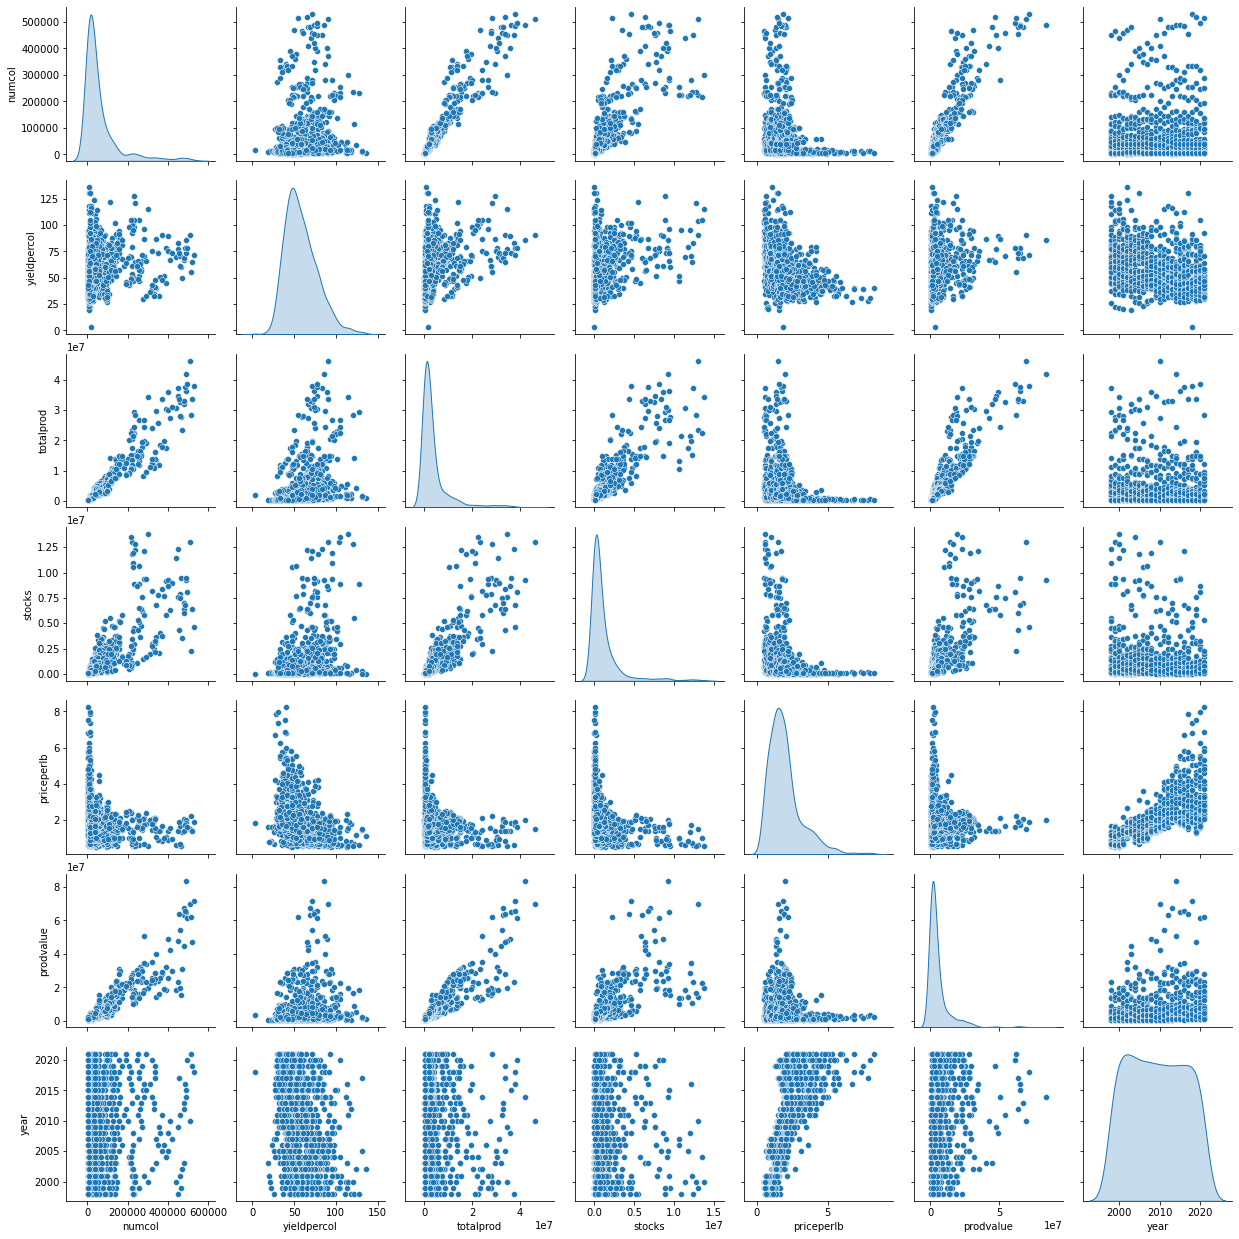

In [10]:
sns.pairplot(df,diag_kind="kde")
plt.show()

In [11]:
corr=df.corr()
corr

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.198576,0.949640,0.796897,-0.223360,0.912601,0.034365
yieldpercol,0.198576,1.000000,0.364392,0.356294,-0.398247,0.224704,-0.318318
totalprod,0.949640,0.364392,1.000000,0.864333,-0.252678,0.900720,-0.048837
stocks,0.796897,0.356294,0.864333,1.000000,-0.284894,0.693372,-0.137590
priceperlb,-0.223360,-0.398247,-0.252678,-0.284894,1.000000,-0.088529,0.694738
prodvalue,0.912601,0.224704,0.900720,0.693372,-0.088529,1.000000,0.178040
year,0.034365,-0.318318,-0.048837,-0.137590,0.694738,0.178040,1.000000


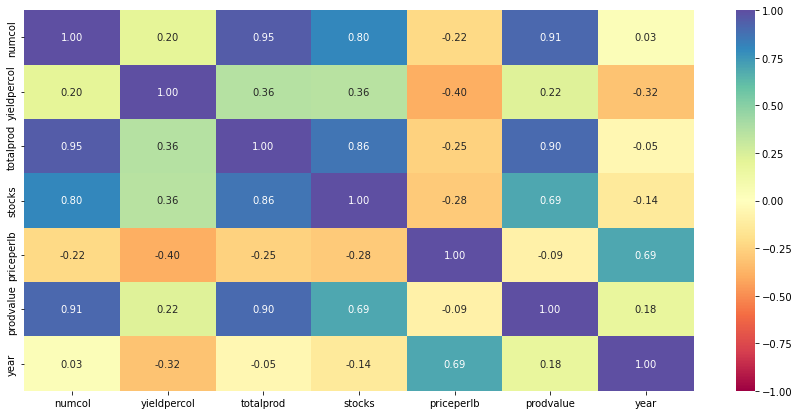

In [12]:
plt.figure(figsize=(15, 7))
sns.heatmap(corr,annot=True, vmin=-1, vmax=1,fmt=".2f", cmap="Spectral")
plt.show()

#### Explore the categrial features- state and year

In [13]:
print(df.State.nunique())
print(df.year.nunique())
# We have honey production data for 44 states over a span of 19 years, from 1998 to 2021

44
24


In [ ]:
#### Overall trends of honey Production in the US over the years

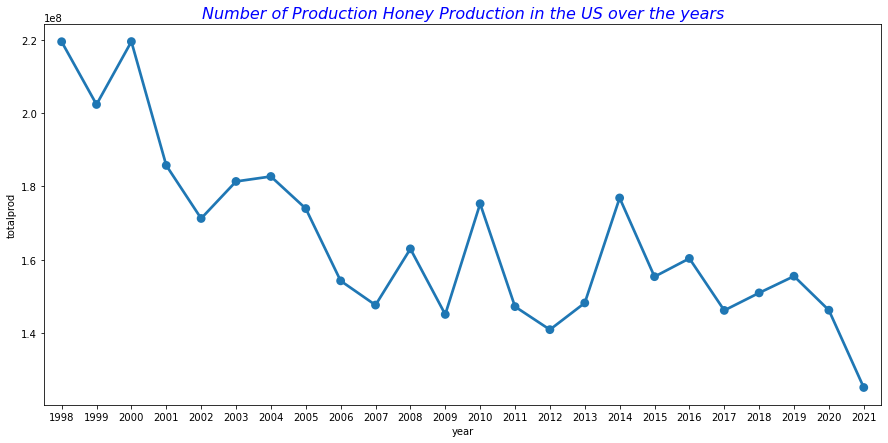

In [14]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year',y='totalprod',data=df,estimator=sum, ci=None)
plt.title('Number of Production Honey Production in the US over the years',fontsize=16,fontstyle='oblique',color='blue')
plt.show()

In [ ]:
# Observations:
1) The overall honey production in the US has been decreasing over the years.

In [ ]:
#### Variation in the number of colonies over the years

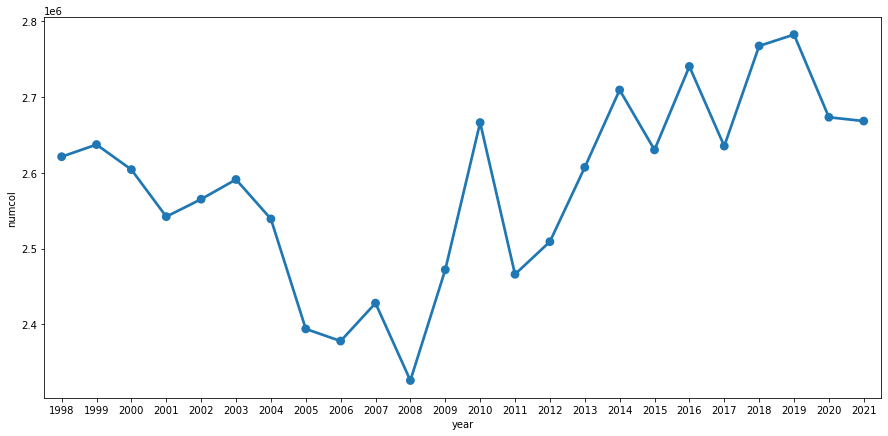

In [15]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year',y='numcol', data=df, ci=None, estimator=sum)
plt.show()

# Observations: 
1) The number of colonies across the country shows a declining trend from 1998-2008 but has seen an upsticksince 2008.
2) It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

In [ ]:
#### Variation of yield per colony over the years

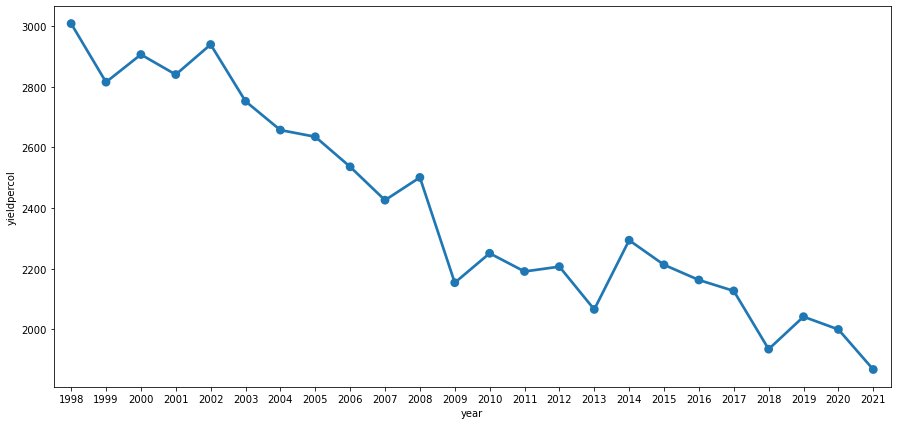

In [16]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year',y='yieldpercol', data=df, ci=None, estimator=sum)
plt.show()

# Observations:
1) In contrast to number of colonies, the yield per colony has been decreasing since 1998.
2) This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.

In [ ]:
#### Production trend at state level

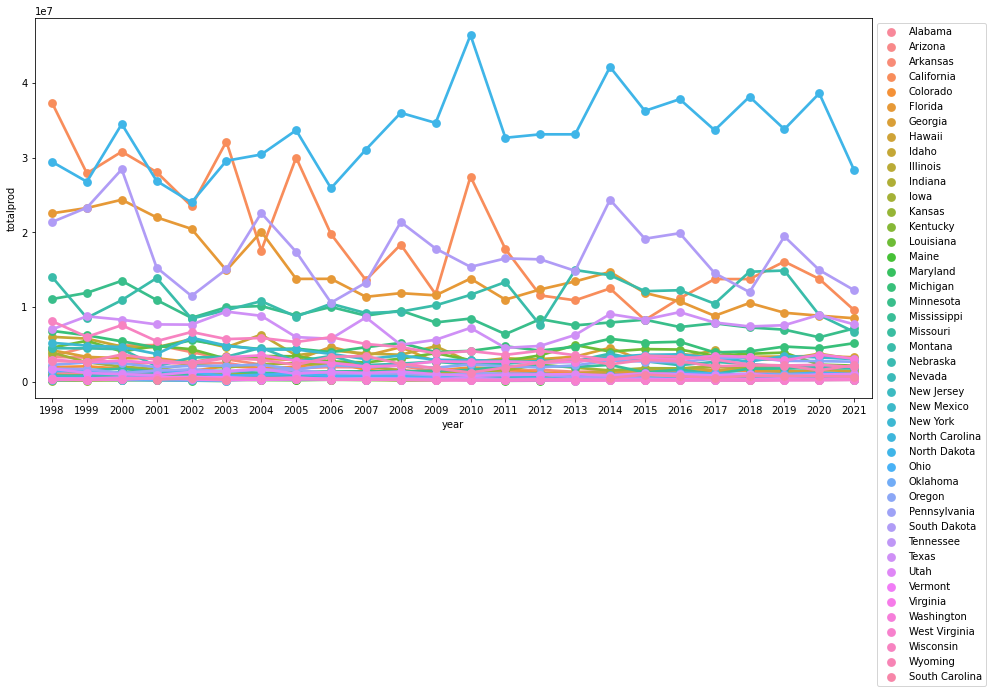

In [17]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year',y='totalprod', data=df, ci=None, hue="State")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Observations:
There are some states that have much higher productions than the others but this plot is a little hard to read. Let us plotting each state seperatly for a better understanding.

In [ ]:
#### Catplot

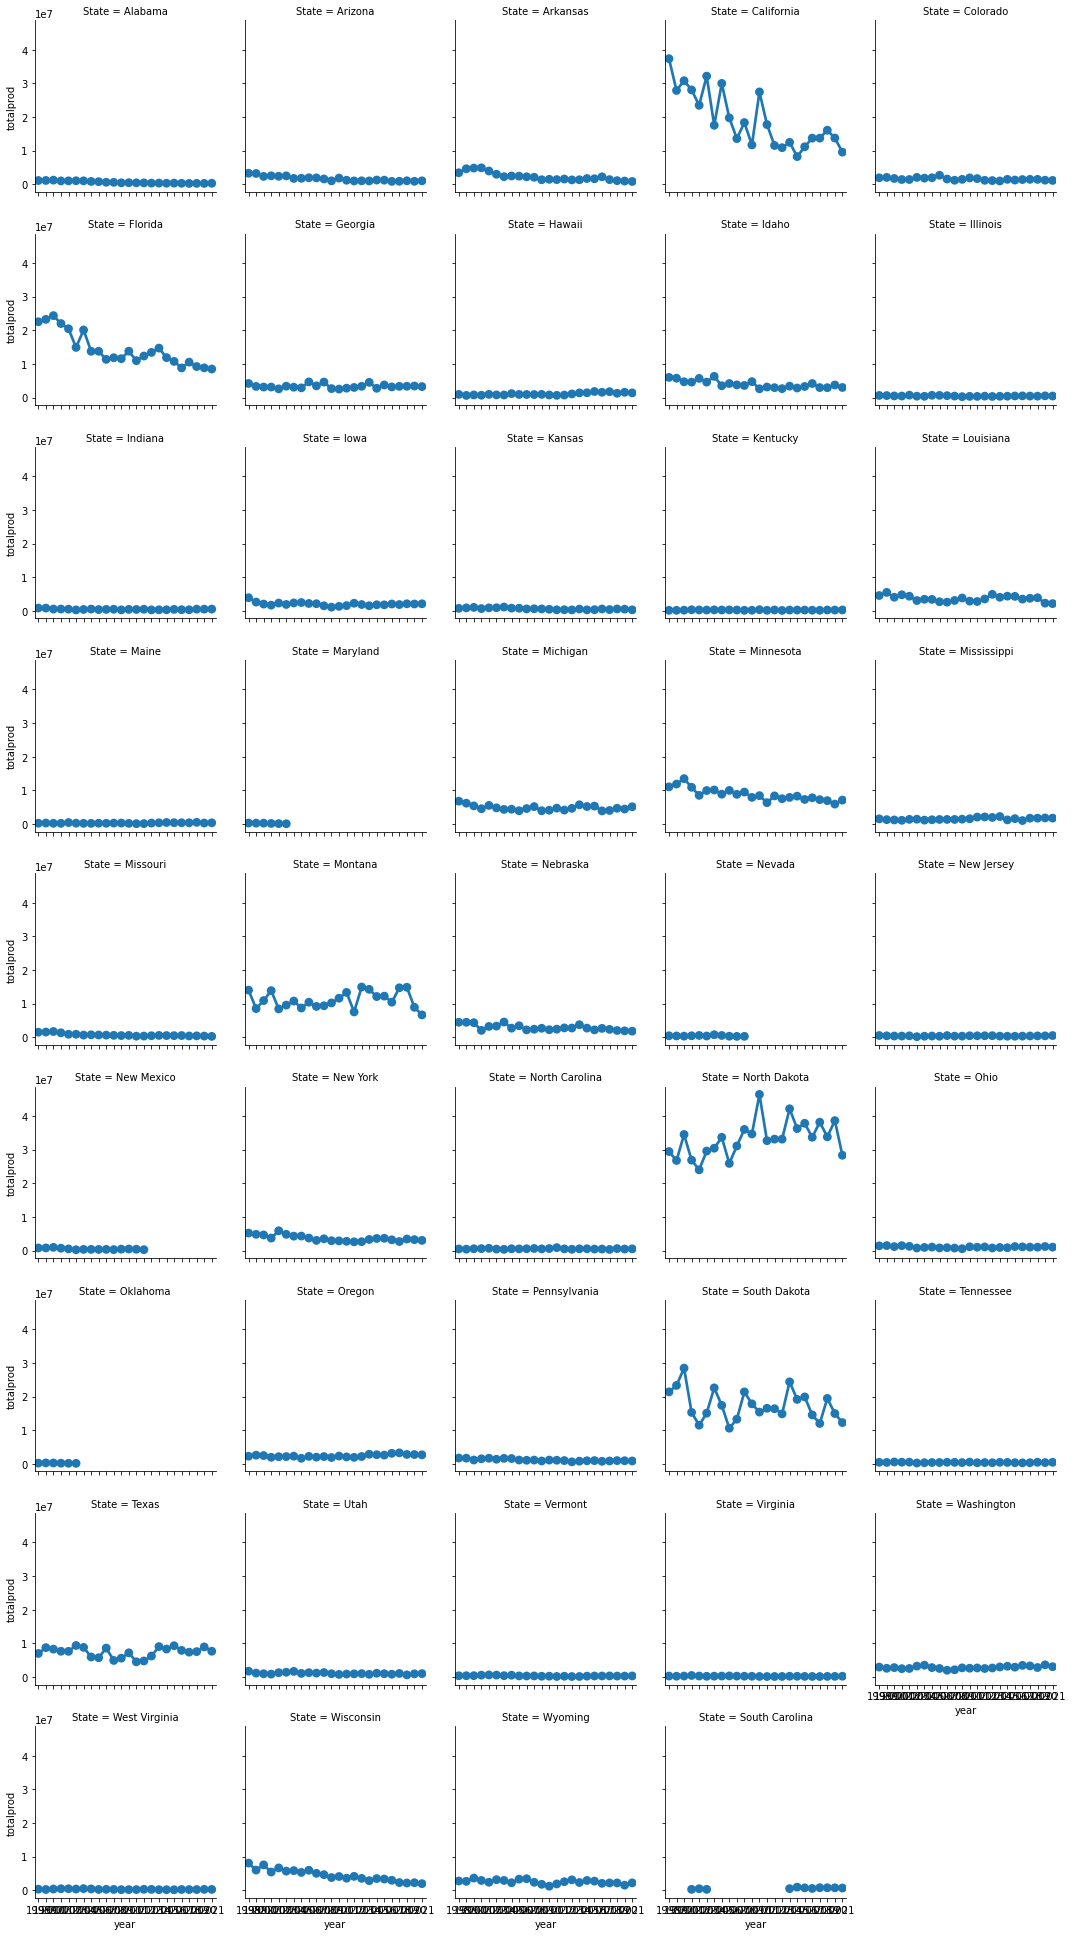

In [18]:
sns.catplot(x='year',y='totalprod',data=df, estimator=sum, col='State', kind="point", height=3, col_wrap=5)
plt.show()

In [ ]:
#### Observation
1) The most prominent honey producing states of the US are California, Florida, North Dakota and south Dakota and Montana.

In [ ]:
## Let us look at the yearly trend in number of colonies and yield per colony in these 5 states

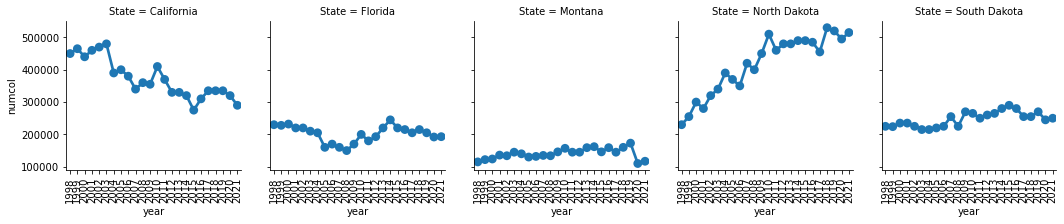

In [19]:
cplot1=sns.catplot(x='year', y='numcol', 
            data=df[df["State"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='State', kind="point",
                height=3,col_wrap = 5)
cplot1.set_xticklabels(rotation=90)
plt.show()

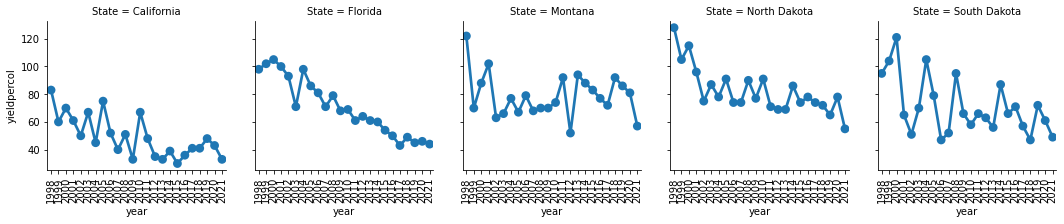

In [20]:
cplot2=sns.catplot(x='year', y='yieldpercol', 
            data=df[df["State"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='State', kind="point",
                height=3,col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

In [ ]:
# Observation:

In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states

If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years

In [ ]:
##### Let us see what effect, the declining production trend has had on the value of production

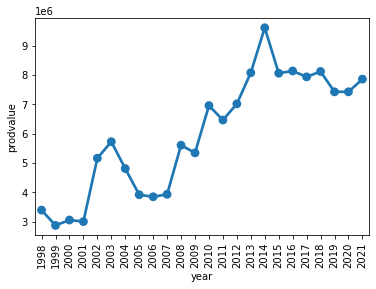

In [22]:
sns.pointplot(x="year", y="prodvalue", data=df, ci=None)
plt.xticks(rotation=90) # To rotate the x axis 
plt.show()

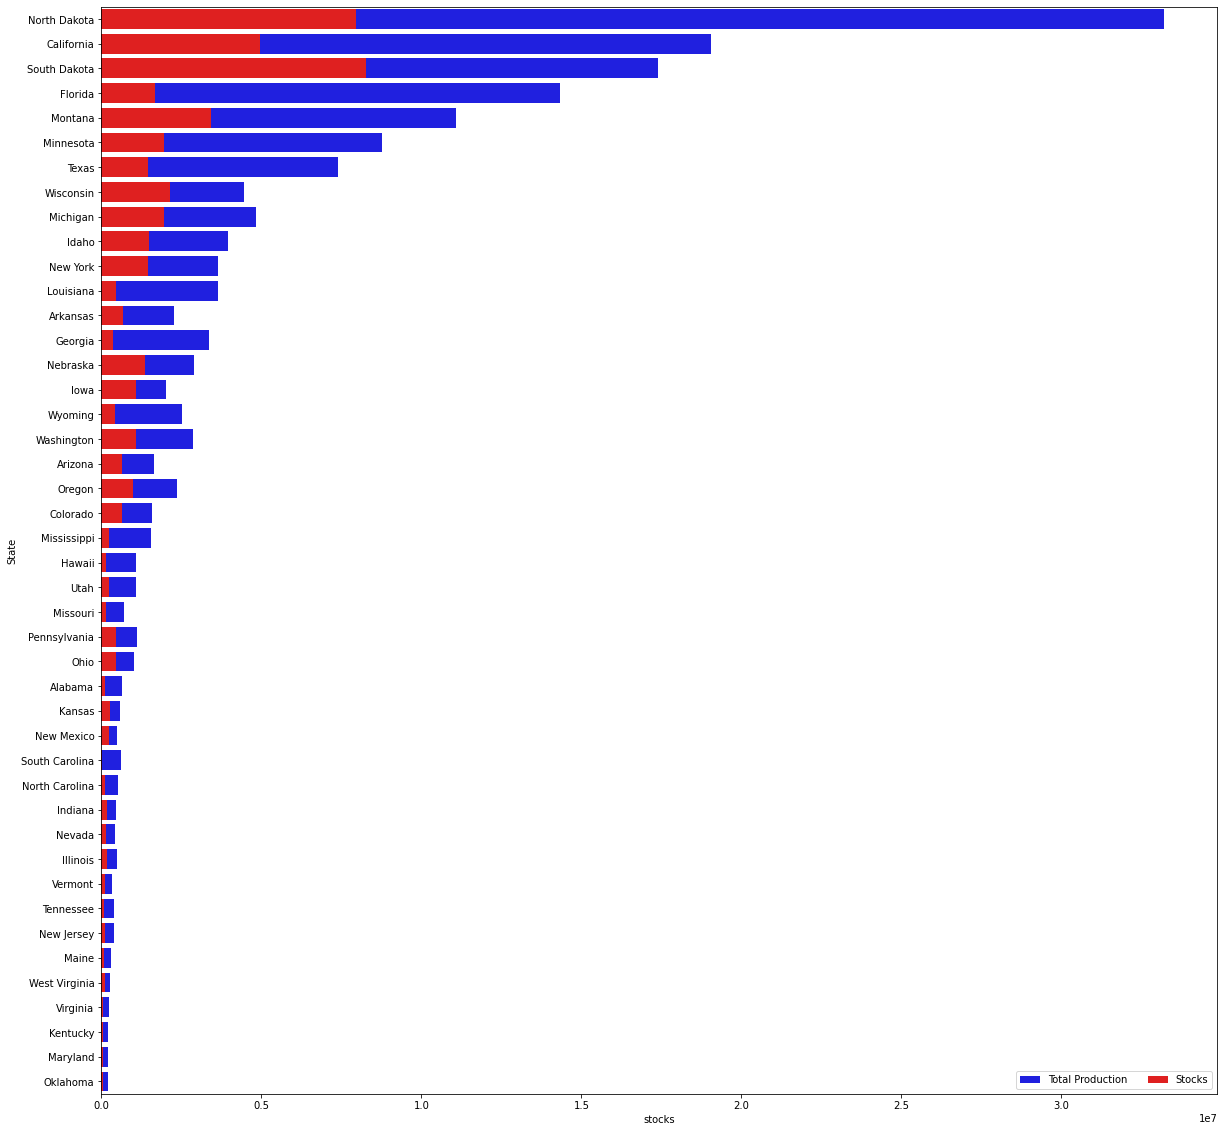

In [23]:
plt.figure(figsize = (20,20)) 
sns.barplot(x="totalprod", y="State", data=df.sort_values("totalprod", ascending=False),label="Total Production", color="b", ci=None)
sns.barplot(x="stocks", y="State", data=df.sort_values("totalprod", ascending=False), label="Stocks", color="r", ci=None) 
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

Observations:
North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value.
Florida has the highest efficiency among the major honey producing states
Michigan is more efficient than Wisconsin in selling honey.

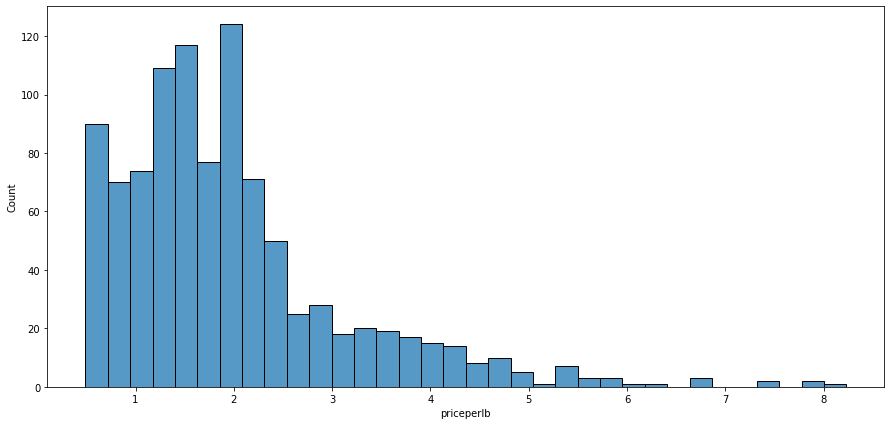

In [24]:
plt.figure(figsize=(15, 7))
sns.histplot(df.priceperlb)
plt.show()

## BOX PLOT

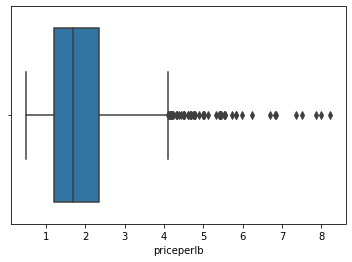

In [25]:
sns.boxplot(data = df, x = 'priceperlb')
plt.show()

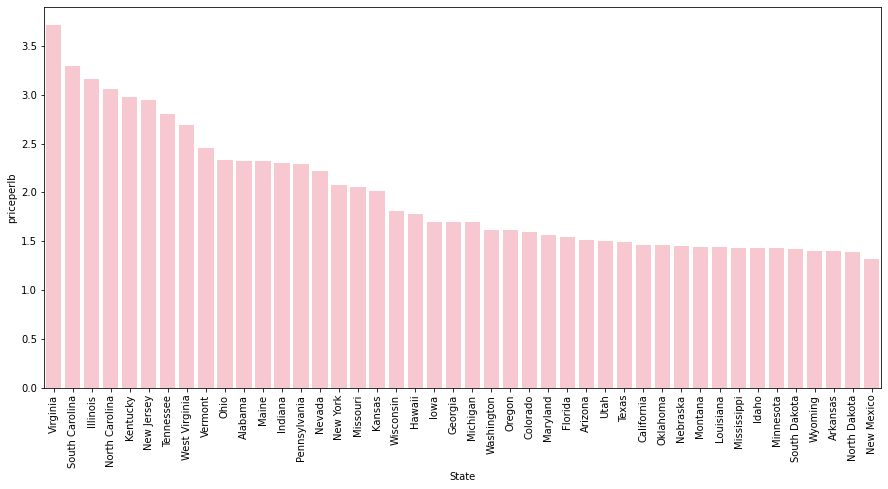

In [27]:
plt.figure(figsize=(15, 7))
sns.barplot(data = df, x = "State", y = "priceperlb", ci=None, color = "pink",
            order=df.groupby('State').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90)
plt.show()